In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pingouin as pg

In [21]:
df=pd.read_csv("jjj.csv")

In [22]:
df.head()

,DATE,CCN ($cm^{-3}$),PM$_{2.5}$ ($\mu$ g m$^{-3}$),SS (%),Precipitation (mm day$^{-1}$),PC_BTH,Height (Re14-cb) (m)
0,2013/8/20,189.000000,17.5,0.880000,22.000000,2,1692.000000
1,2014/6/20,1148.583333,39.5,0.218333,209.166667,3,3420.333333
2,2014/6/21,741.000000,56.0,0.255000,0.000000,3,2706.000000
3,2014/7/17,1828.000000,61.0,0.110000,51.000000,3,4462.000000
4,2014/8/18,399.000000,14.0,0.410000,0.000000,3,2000.000000


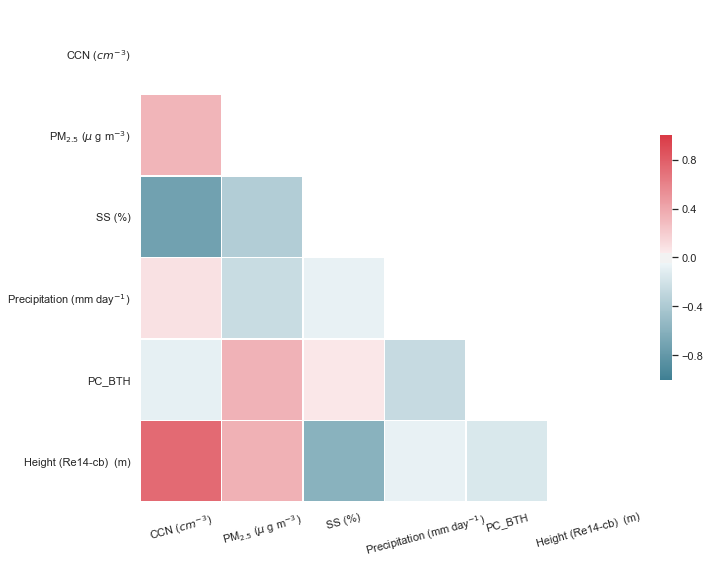

In [23]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot=sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-1, 1),vmax=1.0, vmin=-1.0,center=0.0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=15)
plt.savefig("BTH_corr.png",dpi=600)

In [24]:
df=df[df["Precipitation (mm day$^{-1}$)"]>0]

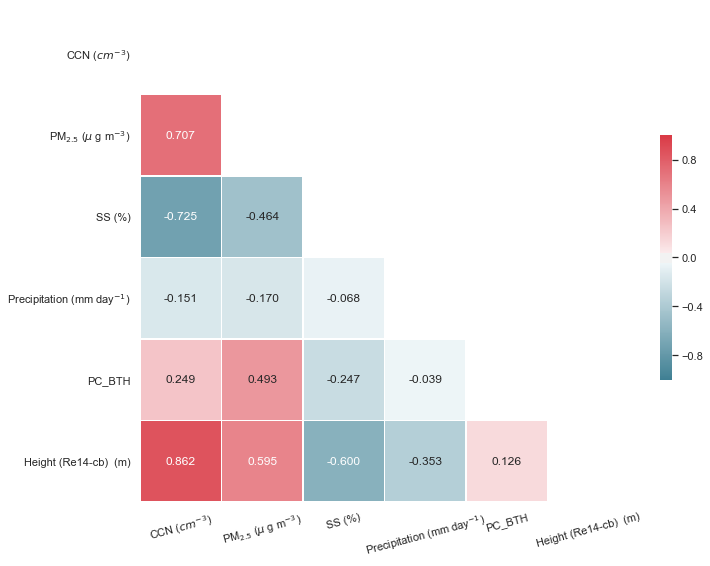

In [25]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-1, 1),vmax=1.0, vmin=-1.0,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt="0.3f")
plt.xticks(rotation=15)
plt.savefig("BTH_corr_num.png",dpi=600)

In [26]:
df.reset_index(drop=True, inplace=True)

In [27]:
df.set_index('DATE', inplace=True)

In [28]:
profile=pandas_profiling.ProfileReport(df)
profile.to_file(outputfile = "jjj_profilerain.html")

In [29]:
pg.ttest(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,7.315,34,two-sided,1.789031e-08,"[649.66, 1149.5]",2.438,4.814e+05,1.0


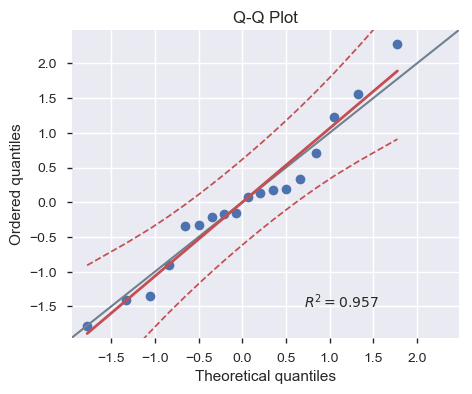

In [30]:
pg.qqplot(df["CCN ($cm^{-3}$)"], dist='norm')

In [31]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,18,-0.151,"[-0.58, 0.34]",0.023,-0.108,0.551044,0.344,0.092


In [32]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,18,-0.151,"[-0.58, 0.34]",0.023,-0.108,0.551044,0.344,0.092


In [33]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["SS (%)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,18,-0.725,"[-0.89, -0.39]",0.525,0.462,0.000669,61.041,0.952


In [34]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Height (Re14-cb)  (m)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,18,0.862,"[0.66, 0.95]",0.744,0.709,0.000004,4852.692,0.999


In [35]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values, method="spearman")

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,18,-0.265,"[-0.65, 0.23]",0.07,-0.054,0.287484,0.189


In [38]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='Precipitation (mm day$^{-1}$)', subject='PC_BTH')

,r,dof,pval,CI95%,power
rm_corr,-0.126,14,0.64174,"[-0.59, 0.39]",0.075


In [39]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='PM$_{2.5}$ ($\mu$ g m$^{-3}$)', subject='PC_BTH')

,r,dof,pval,CI95%,power
rm_corr,0.687,14,0.003251,"[0.29, 0.88]",0.876


In [40]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='SS (%)', subject='PC_BTH')

,r,dof,pval,CI95%,power
rm_corr,-0.731,14,0.001283,"[-0.9, -0.37]",0.931


In [41]:
pg.rm_corr(data=df, x='CCN ($cm^{-3}$)', y='Height (Re14-cb)  (m)', subject='PC_BTH')

,r,dof,pval,CI95%,power
rm_corr,0.864,14,0.000016,"[0.64, 0.95]",0.998
